# Estadística I

# 1. Variables aleatorias

- Una variable aleatoria es un valor real función del resultado de un experimento
- Una función de una variable aleatoria define otra variable aleatoria
- Se pueden asociar las variables aleatorias a determinadas medidas de interés, tales como la media y la varianza. 
- Una variable aleatoria puede ser condicionada por un evento o por otra variable aleatoria.
- Existe una noción de independencia de una variable aleatoria de un evento o de otra variable aleatoria


# 2. Variables aleatorias discretas:

Una variable aleatoria es denominada discreta por su rango, el cual puede ser finito o contable infinito. Una variable aleatoria que puede tomar un número incontable infinito de valores, no es discreta. 

- Una variable aleatoria discreta es una función evaluada en los reales que es el resultado de un experimento que puede tomar un número finito o contablemente infinito de valores. 

- Una variable aleatoria tiene asociada una función de masa de probabilidad (PMF) que da la probabilidad asociada a cada muestra aleatoria. 

- Una función de una variable aleatoria discreta define otra variable aleatoria discreta, cuya PMF puede ser obtenida de la PMF de la variable aleatoria original.

## Cálculo de la PMF de una variable aleatoria X. 

- Para cada valor posible x de X: 
1. Recolectar todas las posibles salidas que puedan dar lugar al evento {X=x}
2. Sumar las probabilidades para obtener px(x)


# 2.1 Variable aleatoria Bernoulli

La variable aleatoria Bernoulli toma los valores 1 o 0, es decir:

\begin{equation}
    f(p) =
    \left\{
        \begin{array}{cc}
                p & \mathrm{si\ } x=1 \\
                1-p & \mathrm{si\ } x=0 \\
        \end{array} 
    \right.
\end{equation}

#### Ejercicio 1: Simule en python 4 diferentes PMFs Bernoulli y realice las gráficas correspondientes, ponga etiquetas y títulos a las gráficas. 


In [9]:
import numpy as np
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_notebook, show
output_notebook() 

x = [0,1]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.segment('x', 'y','x',0, source=source, color="#F4A582",line_width=3)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var y = data['y']

    y[0] = 1-f
    y[1] = f
    source.change.emit();
""")

slider = Slider(start=0, end=1, value=1, step=.05, title="p")
slider.js_on_change('value', callback)

plot.yaxis.axis_label = "P(X)"

plot.xaxis.axis_label = "X"

layout = column(slider, plot)



show(layout)

Loading BokehJS ...

0.7

# 2.2 Variable aleatoria Binomial


\begin{equation}    
p(k) = {n \choose k} p^k(1-p)^{n-k}
\end{equation}

\begin{equation}    
p(k) = \frac{n!}{k!(n-k)!} p^k(1-p)^{n-k}
\end{equation}


donde $k=0,1,...,n$

La condición de normalización es escrita como 

\begin{equation}    
\sum_{k=0}^{n}{{n \choose k} p^k(1-p)^{n-k}}=1
\end{equation}

#### Ejercicio 2: Simule y grafique las PMFs para variables binomiales distribuidas con $p=\{0.10, 0.37, 0.63, 0.90 \}$ para valores de $n={20, 40, 60}$

In [4]:
import matplotlib.pyplot as plt
def binomial(x,n,p):
    return (np.math.factorial(n)/(np.math.factorial(x)*np.math.factorial(n-x)))*p**x*(1-p)**(n-x)


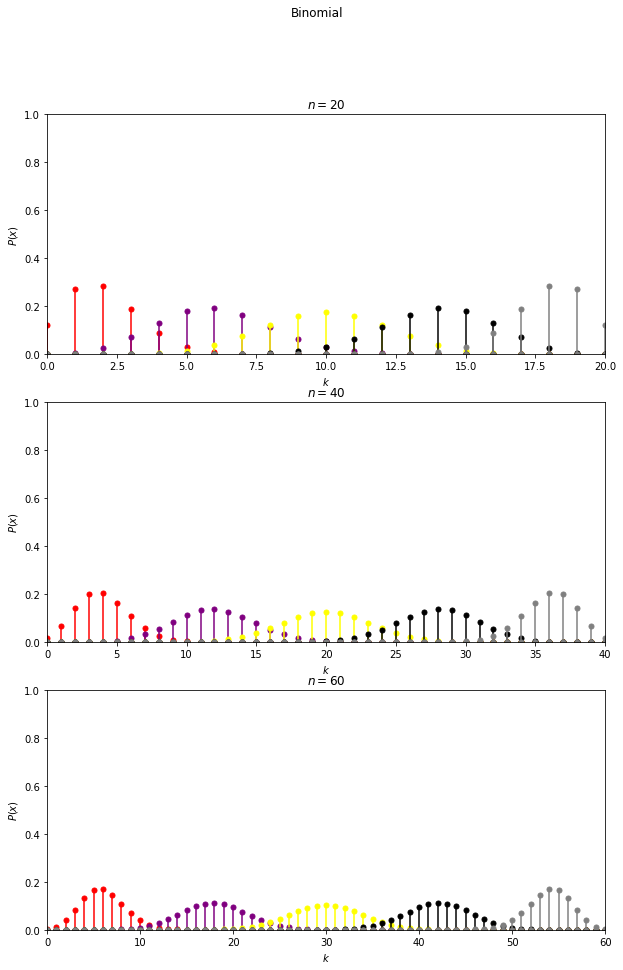

In [11]:

def graficarBinomial():
    p=np.array([0.1,0.3,0.5,0.7,0.9])
    cs=['red','purple','yellow','black','gray','green','orange','cyan']
    fig,ax=plt.subplots(3,1,figsize=(10,15))
    for _i in range(1,4):
        n=20*_i
        x=np.linspace(0,n,n+1)
        for i in range(0,len(p)):
            for _x in x:
                if _x==0:
                    ax[_i-1].axvline(x=_x,ymax=binomial(_x,n,p[i]),c=cs[i],marker='o',markersize=5,label=r"$p=%.2f$"%(p[i]))
                else:
                    ax[_i-1].axvline(x=_x,ymax=binomial(_x,n,p[i]),c=cs[i],marker='o',markersize=5)


                ax[_i-1].set_xlim([0,n])
                ax[_i-1].set_xlabel(r'$k$')
                ax[_i-1].set_ylabel(r'$P(x)$')
                ax[_i-1].set_ylim([0,1])
        ax[_i-1].set_title(r'$n={}$'.format(n))


    plt.suptitle('Binomial')
    plt.show()




graficarBinomial()


# 2.3 Variable aleatoria geométrica. 

Suponga que se realizan repetidamente procesos Bernoulli con una probabilidad $p$. La distribución geométrica es el número de intentos necesarios para que $x=1$ sea el resultado por primera vez. La PMF está dada por:
\begin{equation}
p(k)=(1-p)^{k-1}p, 
\end{equation}

$k=1,2,...,$

#### Ejercicio 3: Simule y grafique las PMFs para variables geométricas distribuidas con $p=\{0.2, 0.5, 0.8\}$

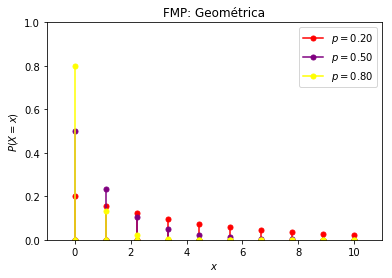

In [65]:
def geometrica(x,p):
    n=20
    return p*(1-p)**(x)


def graficarGeometrica():
    p=np.linspace(0.2,0.8,3)
    cs=['red','purple','yellow','black','gray','green','orange','cyan']
    x=np.linspace(0,10,10)
    for i in range(0,len(p)):
        for _x in x:
            if _x==0:
                plt.axvline(x=_x,ymax=geometrica(_x,p[i]),c=cs[i],marker='o',markersize=5,label=r"$p=%.2f$"%(p[i]))
            else:
                plt.axvline(x=_x,ymax=geometrica(_x,p[i]),c=cs[i],marker='o',markersize=5)
        
            plt.legend()
            plt.xlabel(r'$x$')
            plt.ylabel(r'$P(x)$')
            plt.ylim([0,1])
            plt.xlim([-1,11])
    plt.title("FMP: Geométrica")
    plt.xlabel(r"$x$")
    plt.ylabel('$P(X=x)$')
    plt.savefig('Geometrica.png')
    plt.show()

graficarGeometrica()

# 2.4 Variable aleatoria Poisson

La PMF de una variable aleatoria Poisson está dada por 

\begin{equation}
p(k)=e^{-\lambda} \frac{\lambda^k}{k!}
\end{equation}

para $k=0,1,2,...$

#### Ejercicio 4: Simule y grafique las PMFs para variables geométricas distribuidas con $\lambda=\{1,5,9\}$

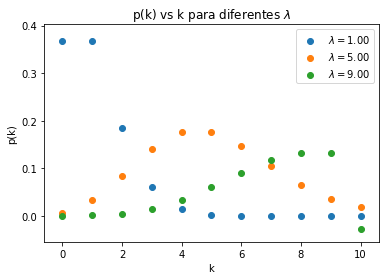

In [21]:
k=np.array([0,1,2,3,4,5,6,7,8,9,10])


def poisson(l,k):
    return np.exp(-l)*l**k/np.math.factorial(k)

l=1
res=[poisson(l,k_)for k_ in k]
plt.scatter(k,res,label=r'$\lambda=%.2f$'%(l))

l=5
res=[poisson(l,k_)for k_ in k]
plt.scatter(k,res,label=r'$\lambda=%.2f$'%(l))

l=9
res=[poisson(l,k_)for k_ in k]
plt.scatter(k,res,label=r'$\lambda=%.2f$'%(l))

plt.title(r'p(k) vs k para diferentes $\lambda$')
plt.xlabel('k')
plt.ylabel('p(k)')
plt.legend()
plt.show()


#Cual es la probabilidad de que tengamos k llegadas en un intervalo de tiempo
# dado que tenemos una tasa de llegadas en ese mismo intervalo de tiempo de 5.

# 3. Variables aleatorias continuas. 

Una variable aleatoria $X$ es continua si existe una función $f_X$ no negativa llamada la función de densidad de probabilidad de $X$, o PDF, tal que

\begin{equation}
P(X\in B)=\int_{B}{f_X (x)dx}
\end{equation}

para todo subconjunto $B$ en la recta real. En particular, la probabilidad de un valor $X$ dentro de un intervalo es 
\begin{equation}
P(a\leq X \leq b) =\int_{a}^{b}{f_X (x) dx}
\end{equation}

y puede ser interprestado como el area bajo la gráfica de la PDF. Para cualquier valor $A$ se tiene $P(X=a)=0$. Por último, la condición de normalización para variables aleatorias continuas es 

\begin{equation}
\int_{-\infty}^{\infty}{f_{X}(x)dx}=P(-\infty < X <\infty)=1
\end{equation}

# 3.1 Variable aleatoria uniforme. 

Para un intervalo $[0,1]$, una posible PDF es

\begin{equation}
    f(x) =
    \left\{
        \begin{array}{cc}
                altura & \mathrm{si\ } 0\leq x\leq 1 \\
                0 & \mathrm{dlc. }  \\
        \end{array} 
    \right.
\end{equation}

#### Ejercicio 5. Halle el valor de c que normaliza la PDF de una variable uniforme para el intervalo $[-1,1]$

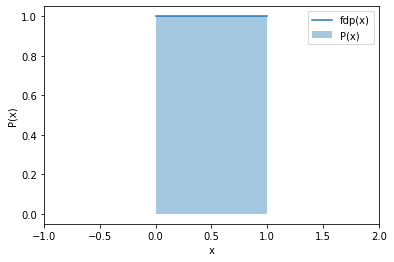

In [33]:
plt.plot([0,1],[1,1],label='fdp(x)')
plt.fill_between(x=[0,1],y1=[0,0],y2=[1,1],alpha=0.4,label='P(x)')
plt.xlim(-1,2)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.show()

# 3.2 Variable aleatoria exponencial. 

Una variable aleatoria exponencial tiene PDF de la forma

\begin{equation}
    f(x) =
    \left\{
        \begin{array}{cc}
                \lambda e^{-\lambda x} & \mathrm{si\ } 0\leq x\geq 1 \\
                0 & \mathrm{dlc. }  \\
        \end{array} 
    \right.
\end{equation}


#### Ejercicio 6. Realice una gráfica de una PDF de una variable aleatoria exponencial que tiene parámetro $\lambda=0.1$ y $\lambda=0.4$

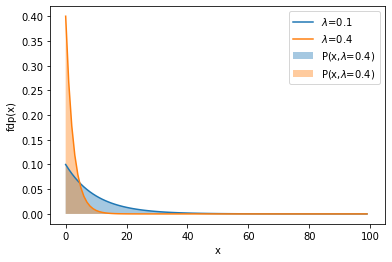

In [52]:
x=np.linspace(0,100,100)

l=0.1
y=l*np.exp(-l*x)
plt.plot(y,label=r"$\lambda$=0.1")
plt.fill_between(x=x,y1=np.zeros((100,1))[:,0],y2=y,alpha=0.4,label=r'P(x,$\lambda$=0.4)')


l=0.4
y=l*np.exp(-l*x)
plt.plot(y,label=r"$\lambda$=0.4")
plt.fill_between(x=x,y1=np.zeros((100,1))[:,0],y2=y,alpha=0.4,label=r'P(x,$\lambda$=0.4) ')



plt.xlabel('x')
plt.ylabel('fdp(x)')
plt.legend()
plt.show()

# 3.3 Variables aleatorias normales

Una variable aleatoria continua $X$ se dice que es normal o Gaussiana si tiene una PDF de la forma

\begin{equation}
f_X (x)=\frac{1}{\sqrt{2\pi}\sigma}{e^{-\frac{(x-\mu)^2}{2\sigma^2}}}
\end{equation}


\begin{equation}
\end{equation}

Se puede verificar la propiedad de normalización haciendo
\begin{equation}
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}{e^{-(x-\mu)^2/2\sigma^2}}dx=1
\end{equation}


#### Ejercicio 7. Realice una gráfica de una PDF de una variable aleatoria normal que tiene parámetros $\sigma=0.1,0.5,2$ con medias $\mu=0, 3, 6$

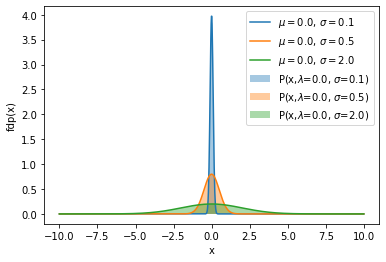

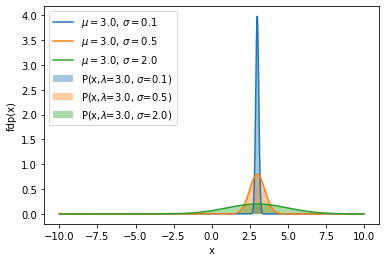

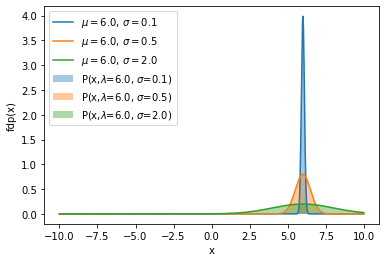

In [62]:
def gauss(x,m,s):
    return 1/(np.sqrt(2*np.pi)*s)*np.exp(-(x-m)**2 / (2*s**2))

x=np.linspace(-10,10,1000)
mus=[0,3,6]
desvs=[0.1,0.5,2]

for mu in mus:
    for desv in desvs:

        y=gauss(x,mu,desv)
        plt.plot(x,y,label=r"$\mu=%.1lf$, $\sigma=%.1lf$"%(mu,desv))
        plt.fill_between(x=x,y1=np.zeros((1000,1))[:,0],y2=y,alpha=0.4,label=r'P(x,$\lambda$=%.1f, $\sigma$=%.1f) '%(mu,desv))


    plt.ylabel('fdp(x)')
    plt.xlabel('x')
    plt.legend()
    plt.show()

# 3.4 Variable aleatoria Gamma

La distribución gamma es una distribución de probabilidad continua con dos parámetros $k$ y $\lambda$ cuya función de densidad para valores x > 0 es

\begin{equation}
f(x)=\lambda e^{(-\lambda x)} \frac{(\lambda x)^{k-1}}{\Gamma(k)}
\end{equation}



#### Ejercicio 8. Realice una gráfica de una PDF de una variable aleatoria normal que tiene parámetros $k=2,3,5$ y $1/\lambda=2,1,0.5$

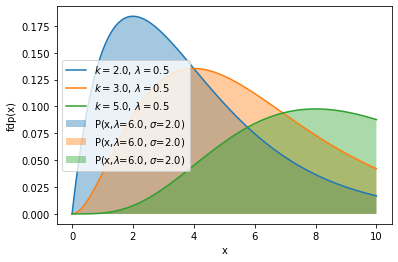

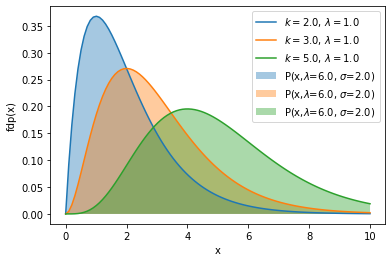

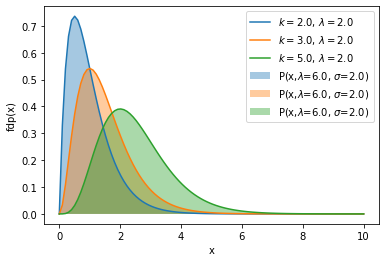

In [64]:
import math
def gamma(l,x,k):
    return (l*np.exp(-l*x))*((l*x)**(k-1)/(math.gamma(k)))

ls=[1/2,1,1/0.5]
ks=[2,3,5]

x=np.linspace(0,10,100)


for l in ls:
    for k in ks:

        y=gamma(l,x,k)
        plt.plot(x,y,label=r"$k=%.1lf$, $\lambda=%.1lf$"%(k,l))
        plt.fill_between(x=x,y1=np.zeros((100,1))[:,0],y2=y,alpha=0.4,label=r'P(x,$\lambda$=%.1f, $\sigma$=%.1f) '%(mu,desv))


    plt.legend()
    plt.xlabel('x')
    plt.ylabel('fdp(x)')
    plt.show()
    

# 4. Funciones de distribución acumuladas.

La CDF $F_{X}$ de una variable aleatoria $X$ está definida como 

\begin{equation}
F_{X}(x)=P(X\leq x) 
\end{equation}

y tiene las siguientes propiedades

- Es monotona no decreciente: si $x \leq y$ entonces, $F_{X}(x)\leq F_{X}(y)$

- F_{X}(x) tiende a 0 en $-\infty$ y tiende a 1 en $\infty$

- Si $X$ es continua, entonces $F_{X}$ es una función continua. 

- Si $X$ es discreta, entonces $F_{X}$ es una función constante a trozos. 

#### Ejercicio 9: Realice la CDF de 2 PMFs y de 2 PDFs ya presentadas 

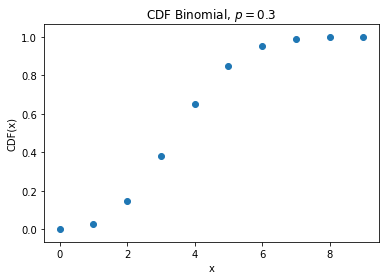

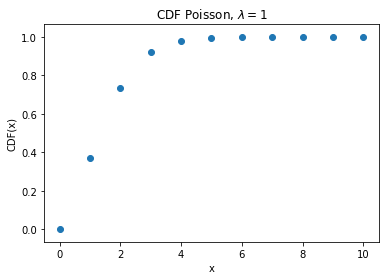

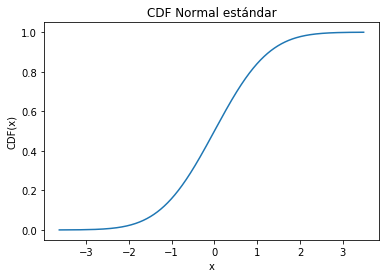

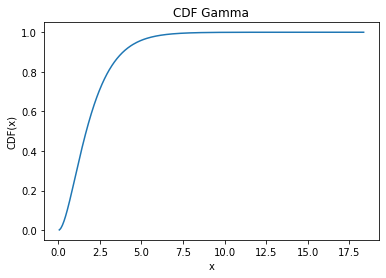

In [91]:
import scipy
import seaborn as sns

n=10
x=np.arange(0,n)
p=0.3
bino=[binomial(xs,n,p) for xs in x]
cdfbino=[ sum(bino[:i]) for i in range(len(bino))]
plt.scatter(x,cdfbino)
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.title(r'CDF Binomial, $p=0.3$')
plt.show()

l=1
k=np.array([0,1,2,3,4,5,6,7,8,9,10])
poison=[poisson(l,k_)for k_ in k]
cdfpoisson=[sum(poison[:i]) for i in range(len(poison))]

plt.scatter(k,cdfpoisson)
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.title(r'CDF Poisson, $\lambda=1$')
plt.show()

x = np.random.randn(10000) # generate samples from normal distribution (discrete data)
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete


sns.lineplot(x=x, y=norm_cdf)
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.title(r'CDF Normal estándar')
plt.show()


shape, scale = 2., 2.
s = np.random.gamma(shape, scale, 1000)
gamma_cdf = scipy.stats.gamma.cdf(s,2) # calculate the cdf - also discrete
sns.lineplot(x=s,y=gamma_cdf)
plt.title('CDF Gamma')
plt.xlabel('x')
plt.ylabel('CDF(x)')

plt.show()